# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [57]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head(10)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
5,2013,7,28,7,UA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1710,87,1.0,2035,183,1,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,0.0,2301,15,1,0
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0.0,1240,-10,0,0
9,2013,5,12,7,UA,12478,John F. Kennedy International,New York,NY,12892,Los Angeles International,Los Angeles,CA,1759,40,1.0,2107,10,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [58]:
#Take a look at the data 
df_flights.shape

(271940, 20)

In [59]:
# Check for any missing data 
df_flights.isnull().sum()
#we see that we have a lot of missing values in column DepDel15
#so we either drop them or replace them with other values 


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [60]:
#looking at the column it is only a binary value whether or not there is a delay greater than 15 minutes , which is easy for us to calculate
#maybe if the delay is 0 ,that could explain the nan value so we can take a look 
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [61]:
#because it is difficult to see if it has 0 delays for every case we can check by summing
df_flights[df_flights.isnull().any(axis=1)]['DepDelay'].describe()


count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [62]:
#since in every case there are no delays, we can simply replace with 0
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [63]:
%matplotlib inline

from matplotlib import pyplot as plt


Text(0.5, 1.0, 'ArrDelay')

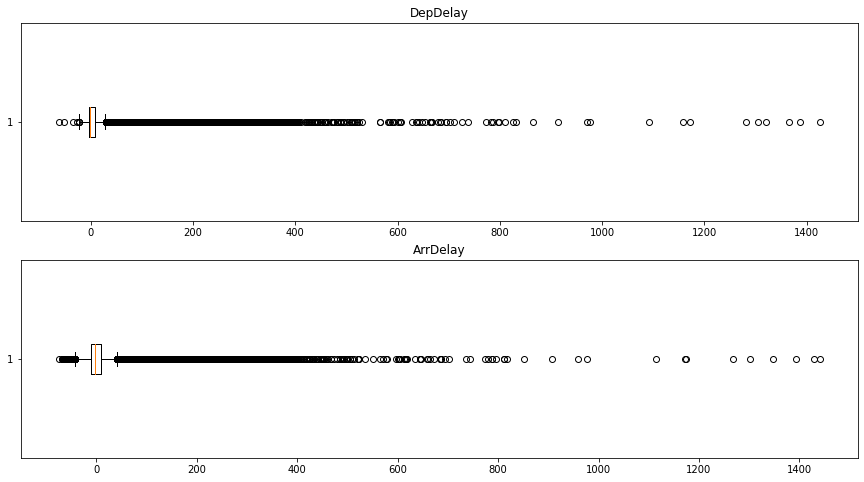

In [64]:
#identify outliers : we can visualize them using a boxplot 
var1 = df_flights['DepDelay']
var2 = df_flights['ArrDelay']
fig , ax = plt.subplots(2,1,figsize = (15,8))
ax[0].boxplot(var1,vert = False)
ax[0].set_title('DepDelay')
ax[1].boxplot(var2,vert  = False)
ax[1].set_title('ArrDelay')

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



C:\Users\ΑΝΝΑ\AppData\Local\Temp\ipykernel_4680\3082807952.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ΑΝΝΑ\AppData\Local\Temp\ipykernel_4680\3082807952.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



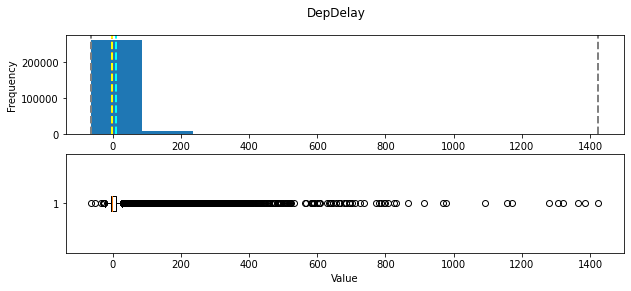

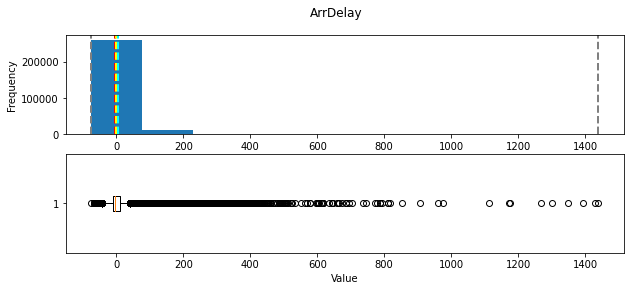

In [65]:
#as we can see some outliers in the upper limits , we can drop the values above 1000.
# Function to show summary stats and distribution for a column
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

# Call the function for each delay field
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    show_distribution(df_flights[col])

In [66]:
#since there are a lot of outliers, we are going to go by percentiles 
#drop those above 90 %
q901 = df_flights['DepDelay'].quantile(0.9)
q901 
q902 = df_flights['ArrDelay'].quantile(0.9)
q902
q011 = df_flights['DepDelay'].quantile(0.01)
q011 
q012 = df_flights['ArrDelay'].quantile(0.01)
q012
#drop them
df_flights = df_flights[df_flights['DepDelay']<q901]
df_flights = df_flights[df_flights['DepDelay']>q011]
df_flights = df_flights[df_flights['ArrDelay']<q902]
df_flights = df_flights[df_flights['ArrDelay']>q012]

DepDelay 
Minimum:-11.00
Mean:1.29
Median:-1.00
Mode:-3.00
Maximum:36.00

ArrDelay 
Minimum:-32.00
Mean:-3.10
Median:-5.00
Mode:0.00
Maximum:37.00



C:\Users\ΑΝΝΑ\AppData\Local\Temp\ipykernel_4680\3082807952.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ΑΝΝΑ\AppData\Local\Temp\ipykernel_4680\3082807952.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


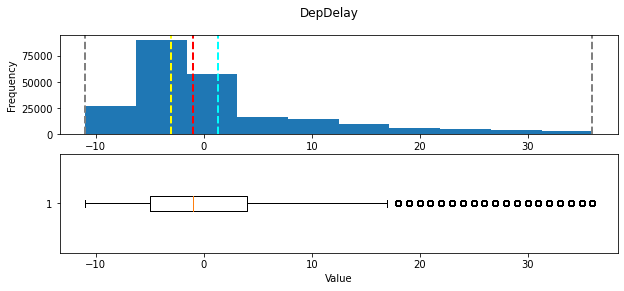

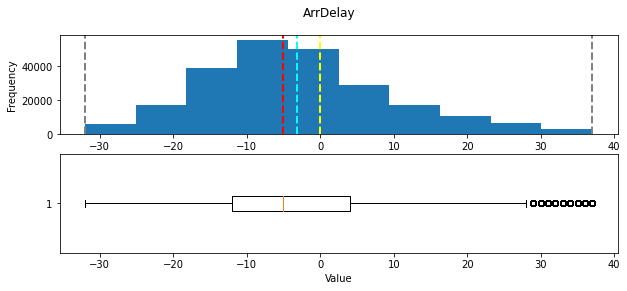

In [67]:
for col in delayFields:
    show_distribution(df_flights[col])
#much better!

### Explore the data 

In [68]:
#summary statistics
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,234802.0,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000,234802.000000
mean,2013.0,7.012951,15.810819,3.902309,12751.998284,12735.984404,1297.782046,1.288417,0.103445,1479.238690,-3.103666,0.116243,0.012155
std,0.0,1.999885,8.838329,1.993400,1508.571872,1506.084054,469.718843,9.153171,0.304539,488.477765,12.946277,0.320516,0.109578
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,900.000000,-5.000000,0.000000,1105.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1255.000000,-1.000000,0.000000,1500.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1705.000000,4.000000,0.000000,1900.000000,4.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


#### What are average (mean) departure and arrival delays?


In [69]:
avg_dep = df_flights['DepDelay'].mean()
avg_arr = df_flights['ArrDelay'].mean()
print('The average departure is {:.2f} minutes and arrival is {:.2f} minutes'.format(avg_dep,avg_arr))

The average departure is 1.29 minutes and arrival is -3.10 minutes


#### How do the carriers compare in terms of arrival delay performance?

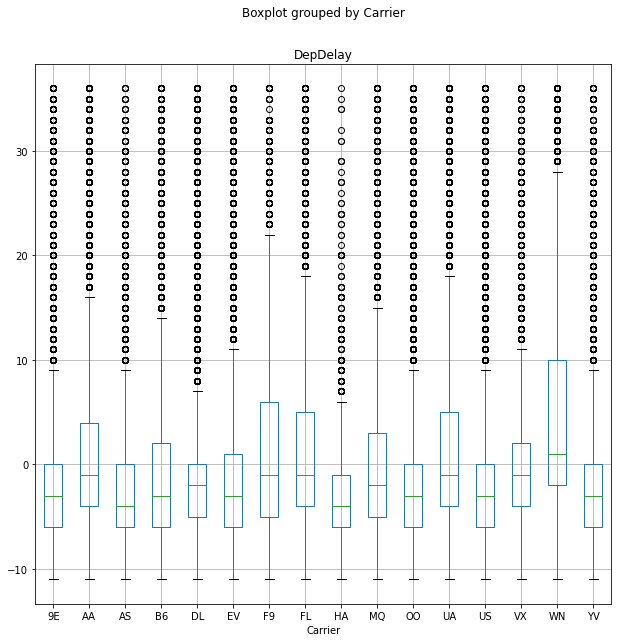

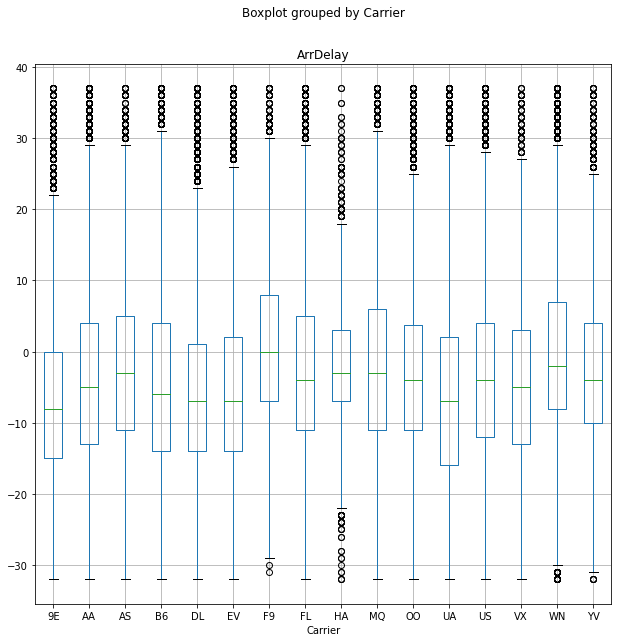

In [70]:
for col in delayFields:
    df_flights.boxplot(column=col,by='Carrier',figsize=(10,10))

#### Are some days of the week more prone to arrival days than others?

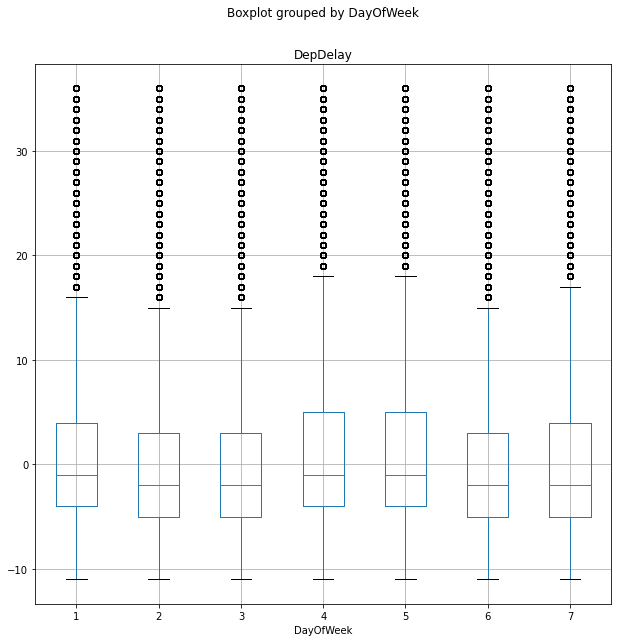

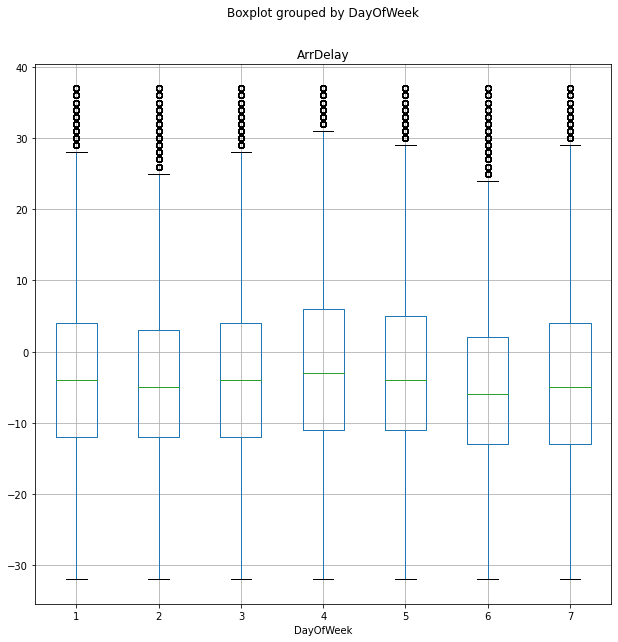

In [71]:
for col in delayFields:
    df_flights.boxplot(column=col,by='DayOfWeek',figsize=(10,10))

#### Which departure airport has the highest average departure delay?

In [72]:
#first we need to group each unique airport 
average_dep_del = df_flights.groupby(df_flights.OriginAirportName)
average_dep_del
mean_departure_delays = pd.DataFrame(average_dep_del['DepDelay'].mean()).sort_values(by='DepDelay',ascending = False)
mean_departure_delays

,DepDelay
OriginAirportName,
Chicago Midway International,6.240506
Dallas Love Field,4.947875
William P Hobby,4.945270
Baltimore/Washington International Thurgood Marshall,3.805278
Denver International,3.681906
...,...
Tucson International,-1.372188
Richmond International,-1.609312
Kahului Airport,-1.852998


<AxesSubplot:xlabel='OriginAirportName'>

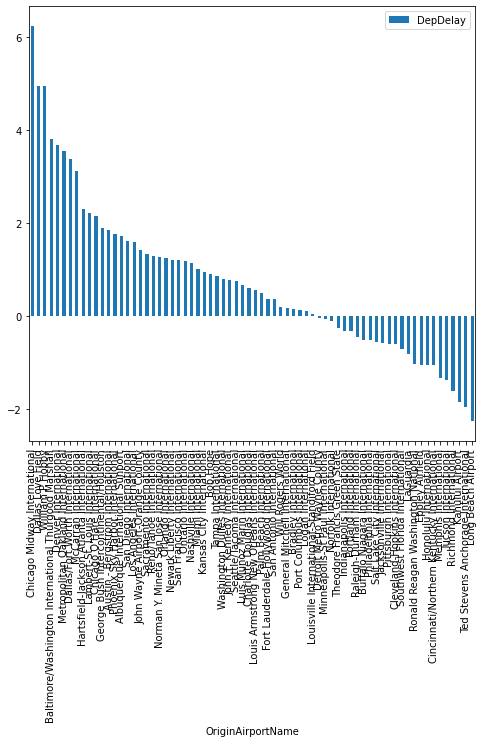

In [73]:
#visualize the results with a barplot
mean_departure_delays.plot(kind='bar',figsize = (8,8))

#### Do *late* departures tend to result in longer arrival delays than on-time departures?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

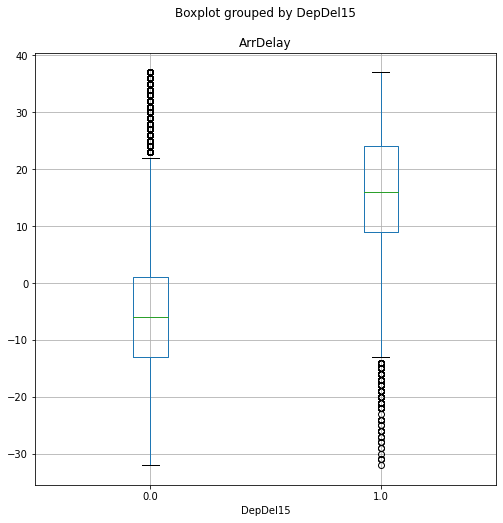

In [74]:
#late departures mean those that have a delay>0 so first we need to find those
df_flights.boxplot(column='ArrDelay',by='DepDel15',figsize=(8,8))

### Which route (from origin airport to destination airport) has the most **late** arrivals?

In [75]:
#create the route by combining the two columns
routes = pd.Series(df_flights['OriginAirportName'] + '>' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

df_flights
#group the unique routes
route_group = df_flights.groupby(df_flights.Route)
route_group

In [78]:
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International>Los Angeles International,146
Los Angeles International>San Francisco International,123
McCarran International>Los Angeles International,90
LaGuardia>Hartsfield-Jackson Atlanta International,88
Los Angeles International>McCarran International,80
...,...
Luis Munoz Marin International>Ronald Reagan Washington National,0
Luis Munoz Marin International>Jacksonville International,0
Luis Munoz Marin International>Chicago O'Hare International,0


#### Which route has the highest average arrival delay?

In [80]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay',ascending=False)

,ArrDelay
Route,
Louis Armstrong New Orleans International>Ronald Reagan Washington National,25.333333
Cleveland-Hopkins International>Palm Beach International,18.000000
Denver International>Raleigh-Durham International,14.153846
Charlotte Douglas International>General Mitchell International,13.500000
Cleveland-Hopkins International>Philadelphia International,12.800000
...,...
Lambert-St. Louis International>Cleveland-Hopkins International,-20.000000
Jacksonville International>Chicago Midway International,-20.000000
Eppley Airfield>LaGuardia,-20.750000
